In [1]:
# IMPORT LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# COLUMNS OF INTEREST


In [4]:
#BsmtFullBath                      : Basement full bathrooms
#BsmtHalfBath                      : Basement half bathrooms
#FullBath                          : Full bathrooms above grade
#HalfBath                          : Half baths above grade
#Bedroom                           : Number of bedrooms above basement level
#Kitchen                           : Number of kitchens
#KitchenQual                       : Kitchen quality
#TotRmsAbvGrd                      : Total rooms above grade (does not include bathrooms)
#Functional                        : Home functionality rating
#Fireplaces                        : Number of fireplaces
#FireplaceQu                       : Fireplace quality
#GarageType                        : Garage location
#GarageYrBlt                       : Year garage was built
#GarageFinish                      : Interior finish of the garage
#GarageCars                        : Size of garage in car capacity

In [5]:
# LOAD DATA


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/jackal0206/public_files/main/train_adjusted.csv')
print(df.columns)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
  

In [7]:
# COLUMNS OF INTEREST

In [8]:
selected_columns = df[['BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars']]
selected_columns.info

<bound method DataFrame.info of       BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0                1             0         2         1             3   
1                0             1         2         0             3   
2                1             0         2         1             3   
3                1             0         1         0             3   
4                1             0         2         1             4   
...            ...           ...       ...       ...           ...   
1455             0             0         2         1             3   
1456             1             0         2         0             3   
1457             0             0         2         0             4   
1458             1             0         1         0             2   
1459             1             0         1         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0                1          Gd             8        Typ 

In [9]:
# MISSING VALUES

In [10]:
columns_to_check=['BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars']
missing_values = df[columns_to_check].isnull().sum()
print(missing_values)


BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
dtype: int64


In [11]:
df['Fireplaces'].head(10)

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    2
8    2
9    2
Name: Fireplaces, dtype: int64

In [12]:
data_types=df[columns_to_check].dtypes
print(data_types)

BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Functional       object
Fireplaces        int64
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars        int64
dtype: object


In [13]:
# Fill missing categorical values with mode
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)


In [14]:
# Fill missing numerical values with mean
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(), inplace=True)


In [15]:
missing_values = df[columns_to_check].isnull().sum()
print(missing_values)

BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
dtype: int64


In [16]:
# CORRELATIONS

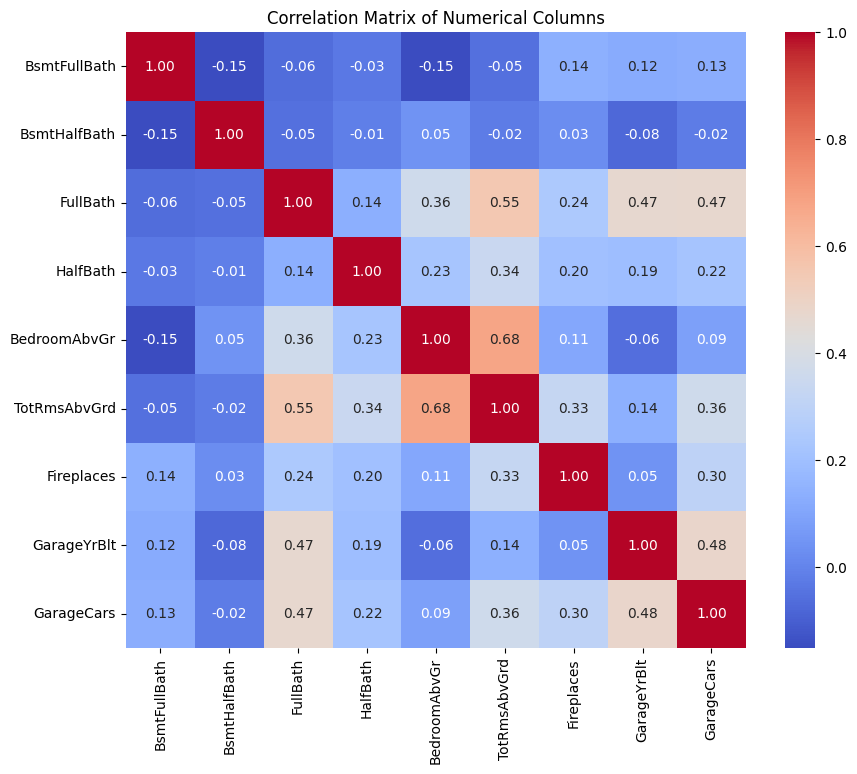

In [17]:
# Select numerical columns
numerical_columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                     'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars']

# Create a correlation matrix
corr = df[numerical_columns].corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


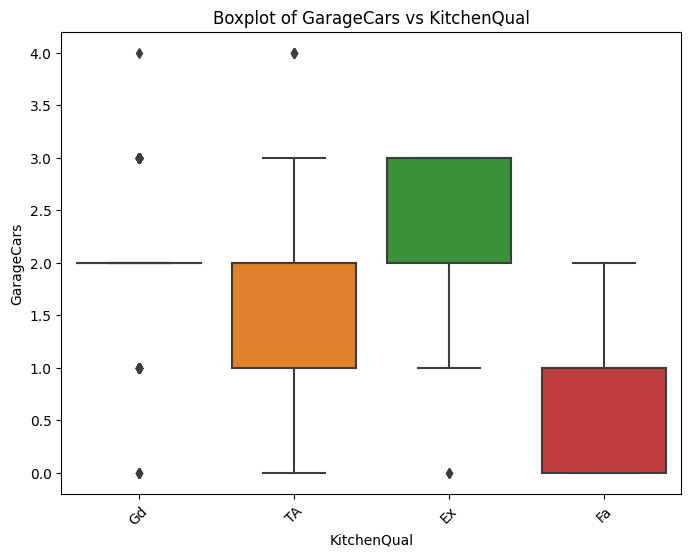

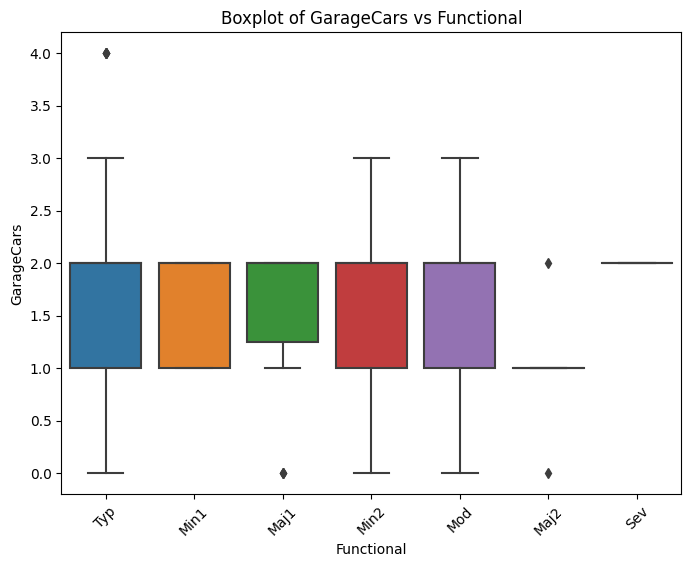

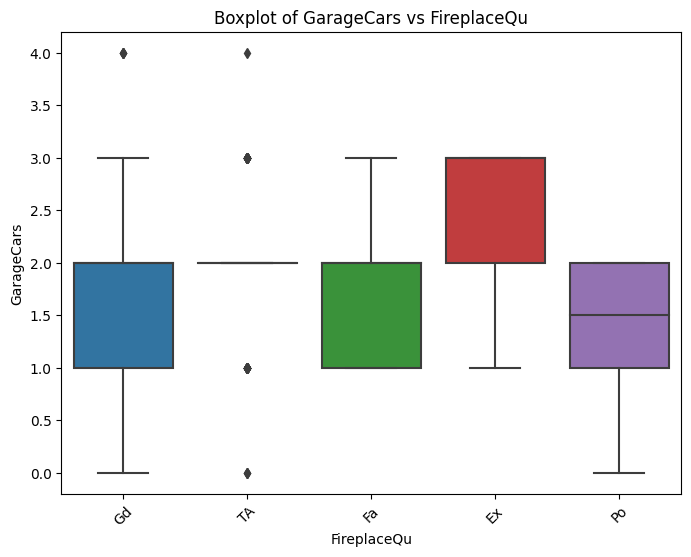

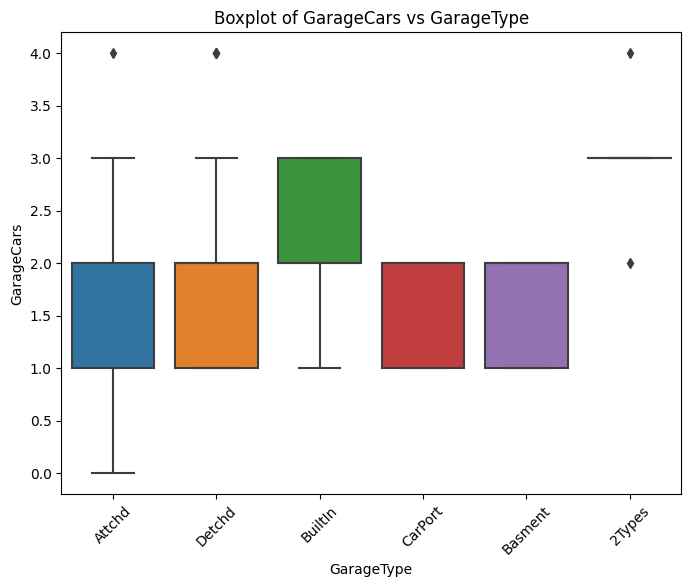

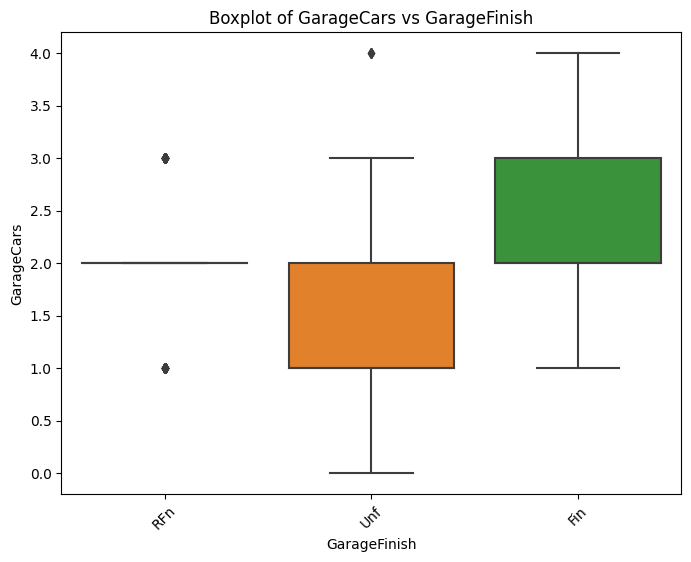

In [18]:
# Select categorical columns
categorical_columns = ['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish']

# Creating box plots to show numerical columns against categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='GarageCars', data=df)
    plt.title(f'Boxplot of GarageCars vs {col}')
    plt.xticks(rotation=45)
    plt.show()


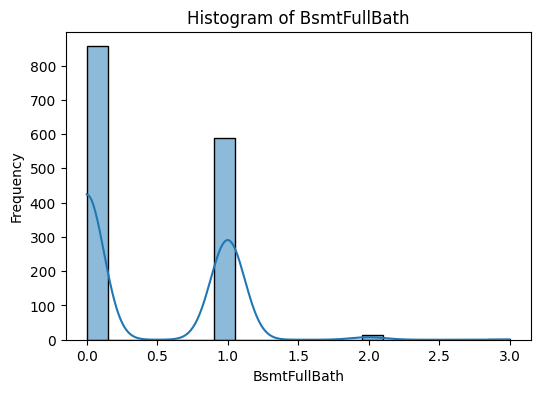

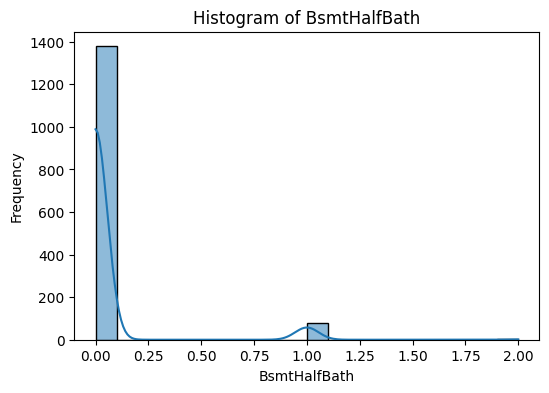

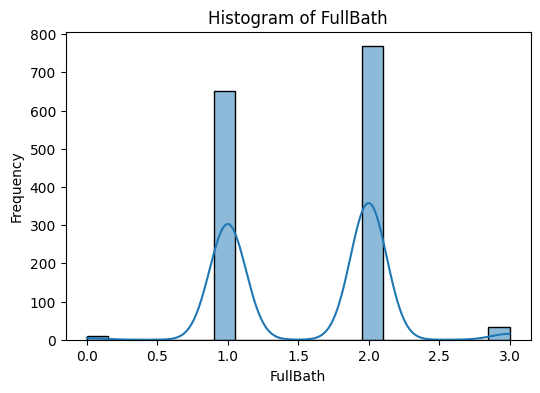

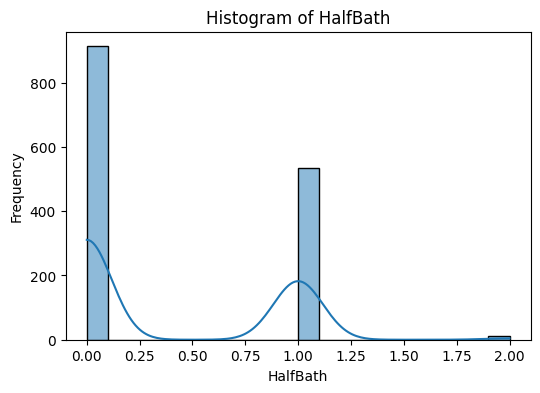

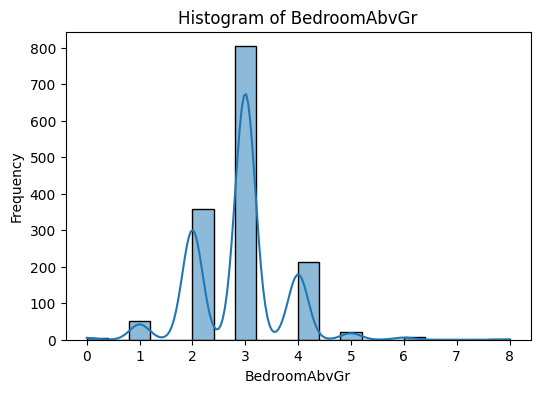

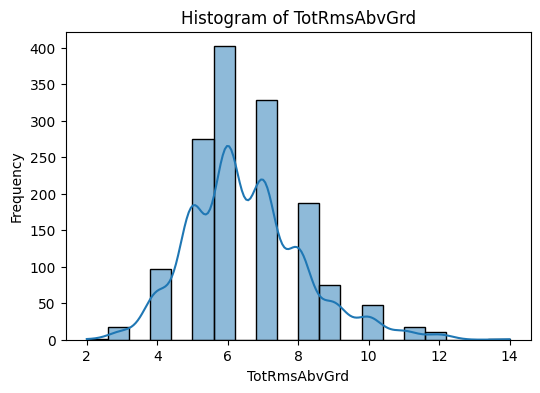

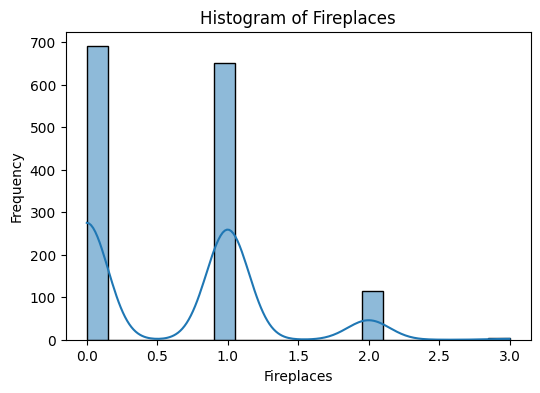

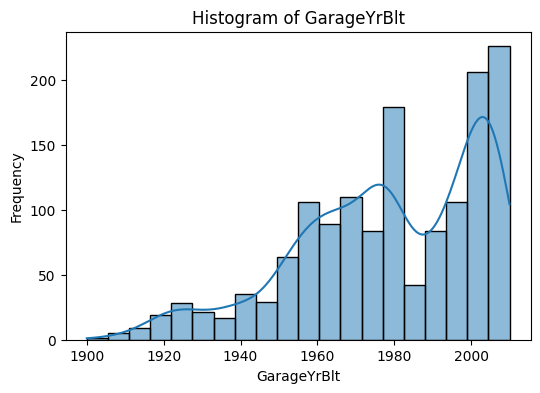

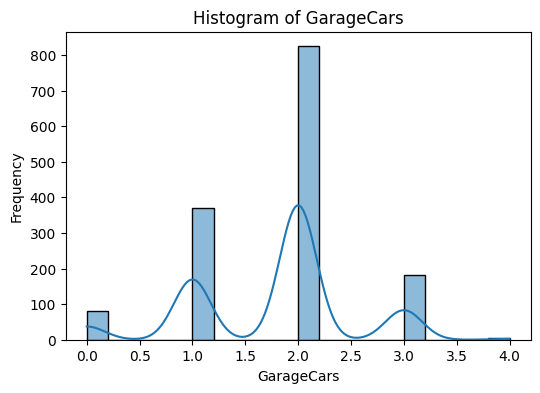

In [19]:
numerical_columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                     'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


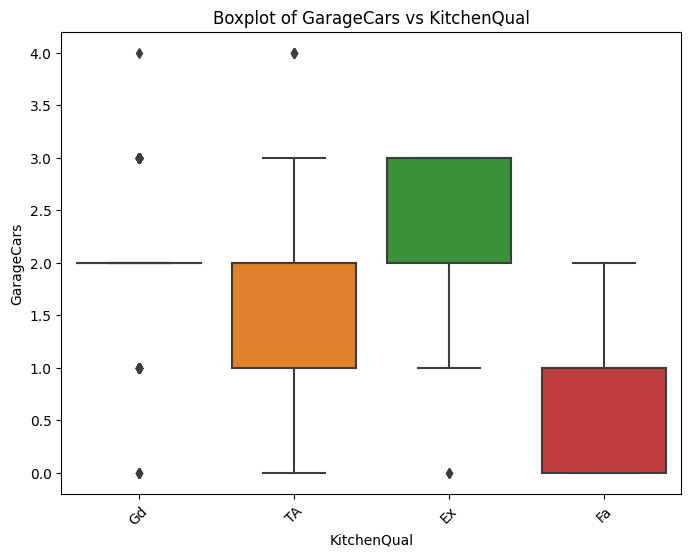

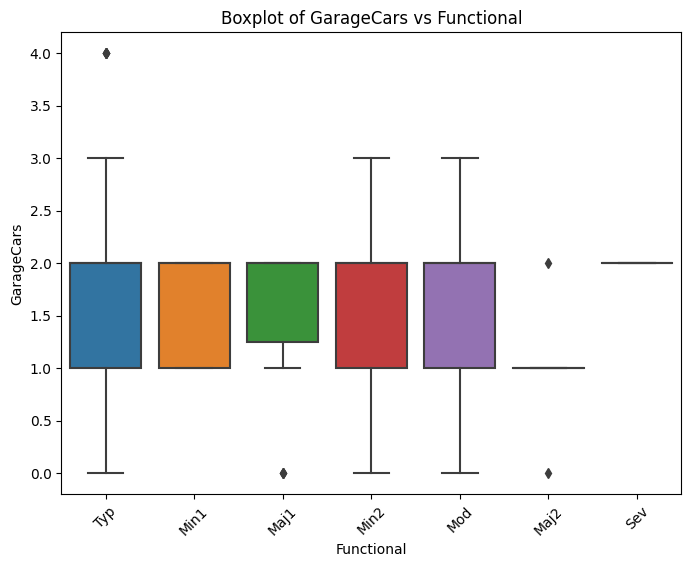

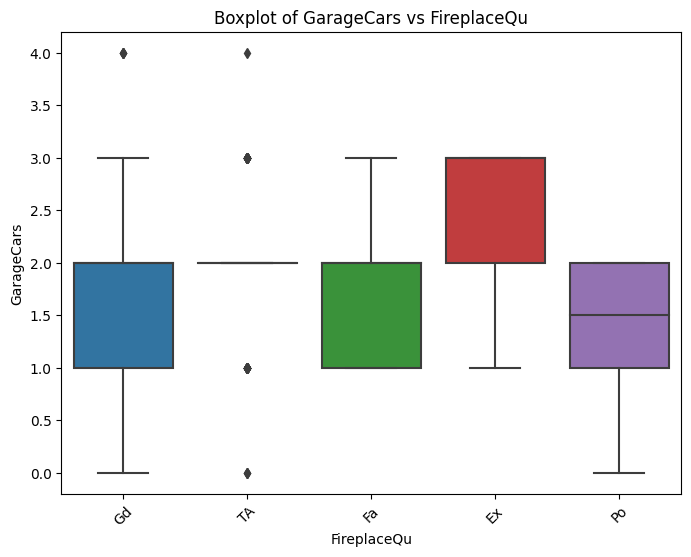

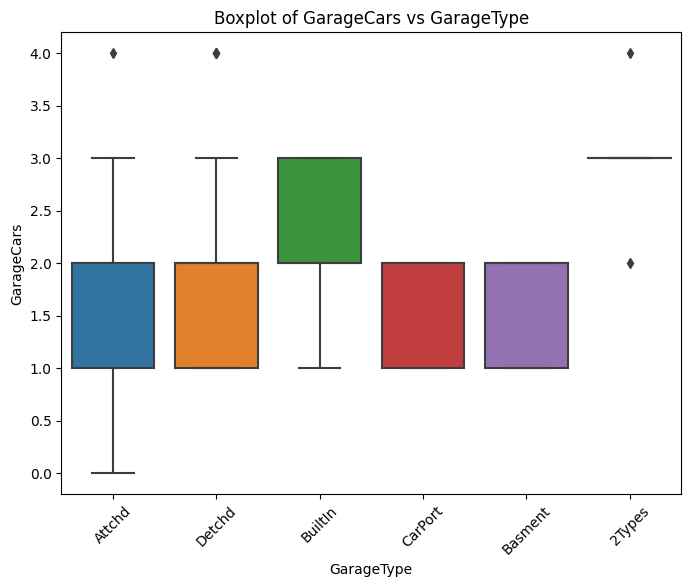

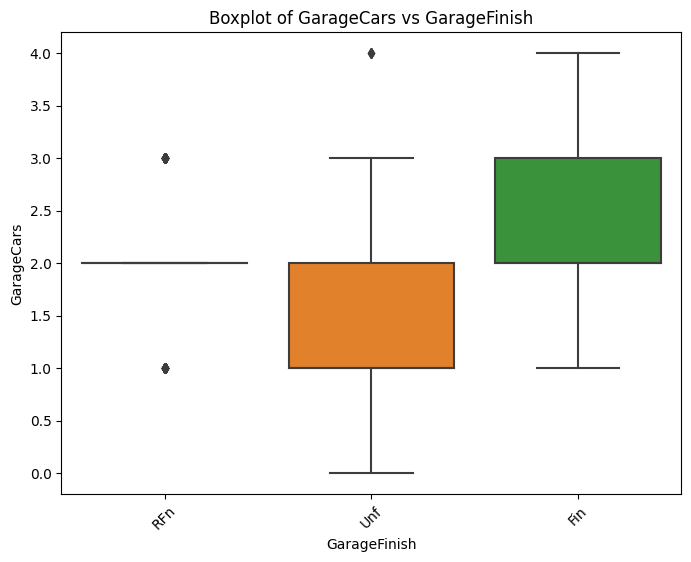

In [20]:
categorical_columns = ['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish']

for cat_col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cat_col, y='GarageCars', data=df)
    plt.title(f'Boxplot of GarageCars vs {cat_col}')
    plt.xticks(rotation=45)
    plt.show()


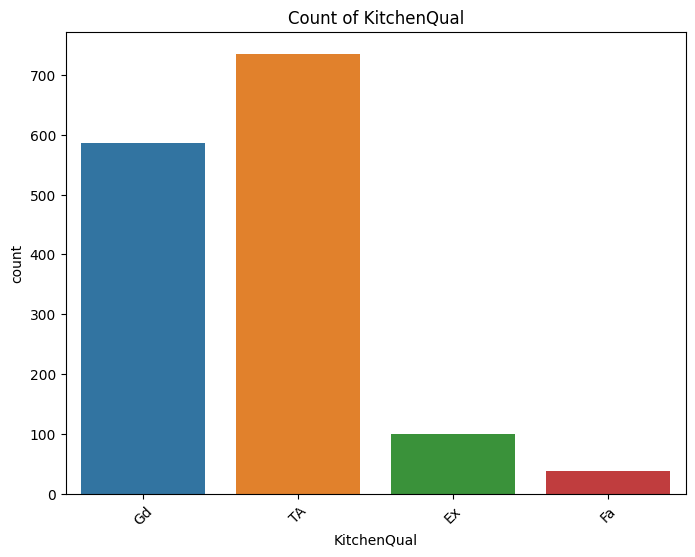

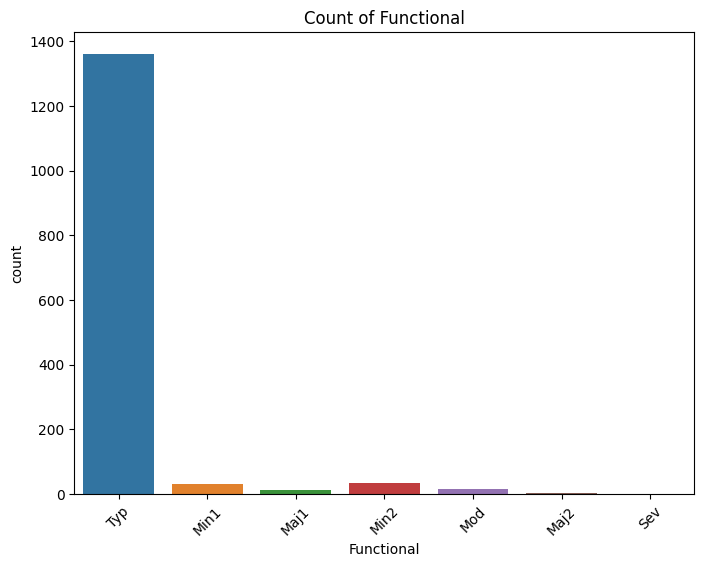

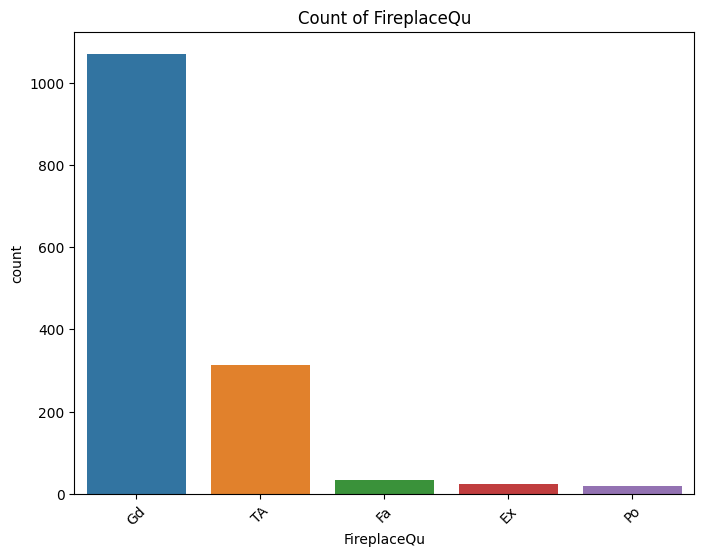

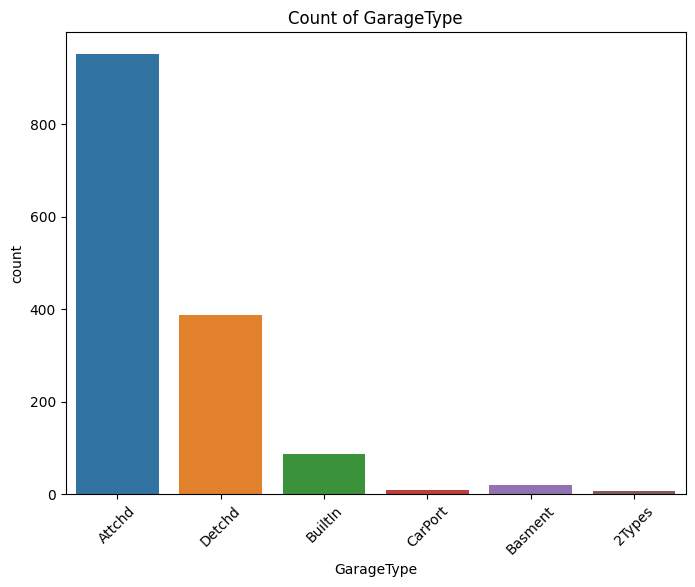

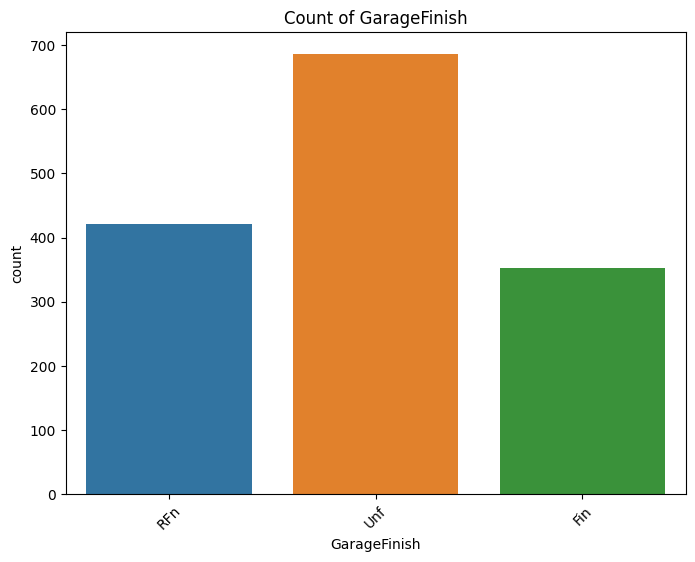

In [21]:
for cat_col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=cat_col, data=df)
    plt.title(f'Count of {cat_col}')
    plt.xticks(rotation=45)
    plt.show()


In [22]:
# CORRELATION WITH SALES PRICE

In [23]:
columns_to_check = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars']

# Add 'SalePrice' to the list of columns to check correlation
columns_to_check.append('SalePrice')

# Get the correlation matrix
correlation_matrix = df[columns_to_check].corr()

# Correlation of features with SalePrice
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(correlation_with_saleprice)


SalePrice       1.000000
GarageCars      0.640409
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageYrBlt     0.470177
Fireplaces      0.466929
HalfBath        0.284108
BsmtFullBath    0.227122
BedroomAbvGr    0.168213
BsmtHalfBath   -0.016844
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64


<ipython-input-23-48bf7e2de919>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[columns_to_check].corr()


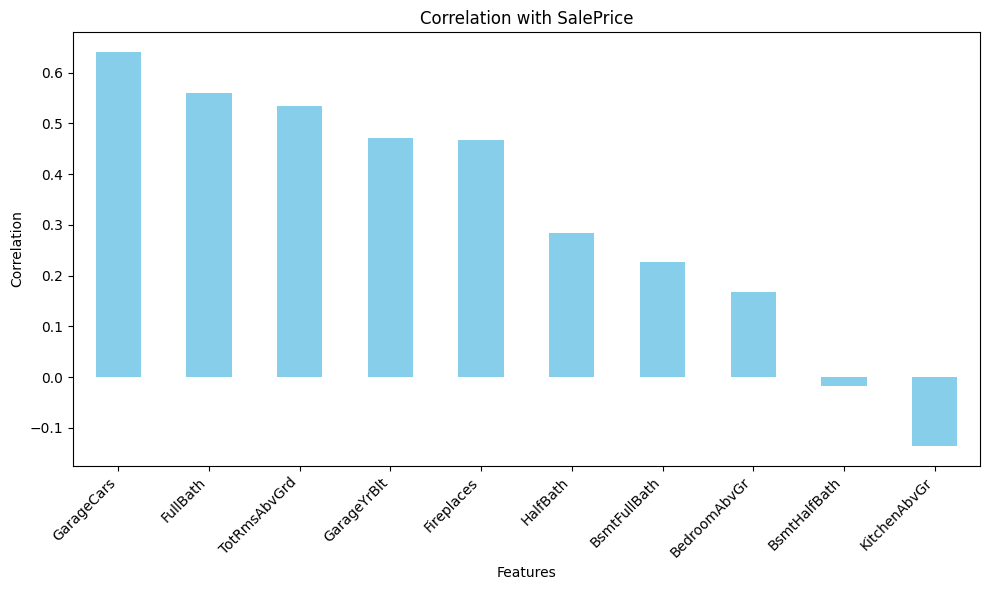

In [24]:
# Plotting the correlations
plt.figure(figsize=(10, 6))
correlation_with_saleprice.drop('SalePrice').plot(kind='bar', color='skyblue')
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


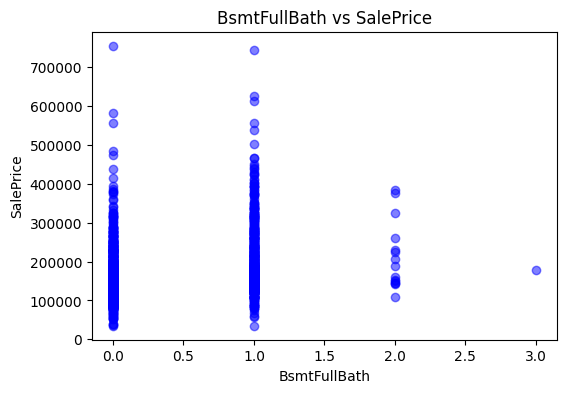

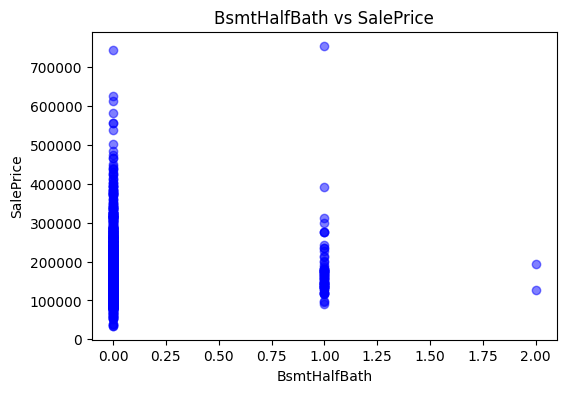

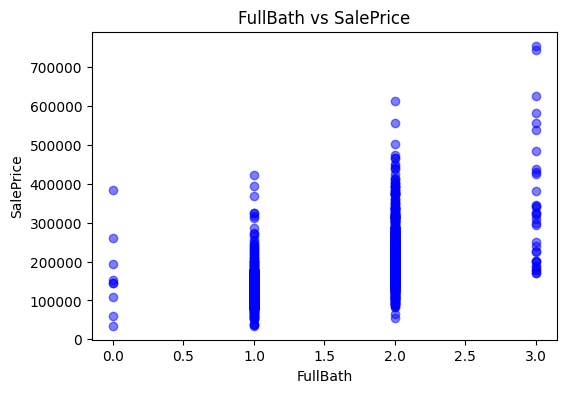

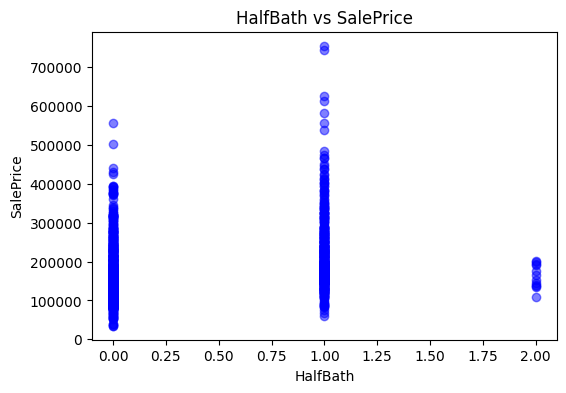

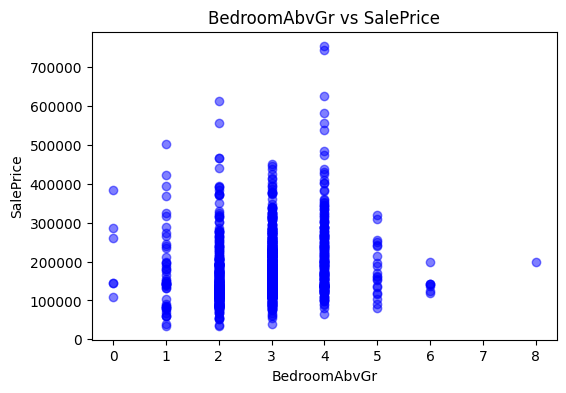

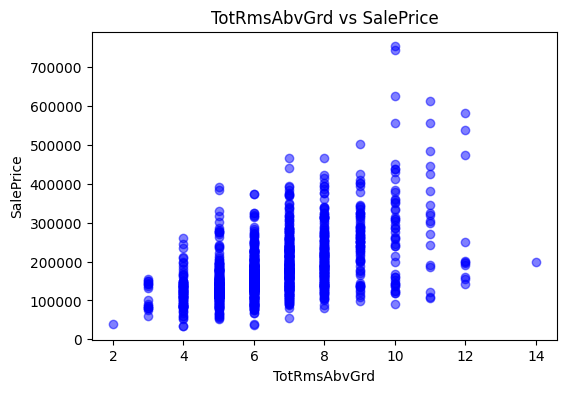

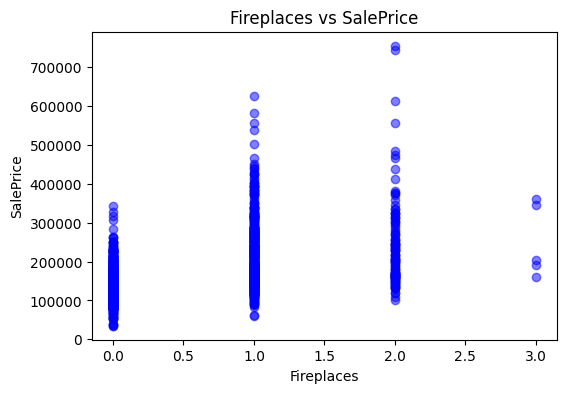

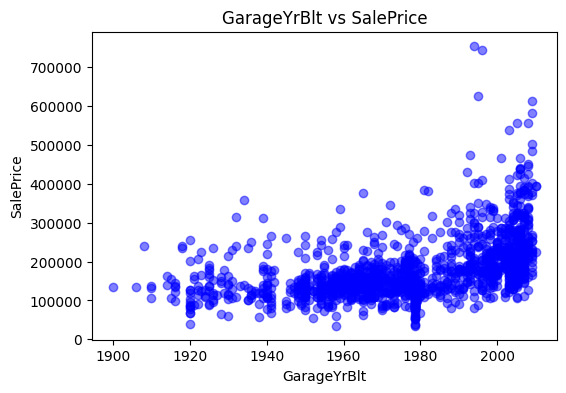

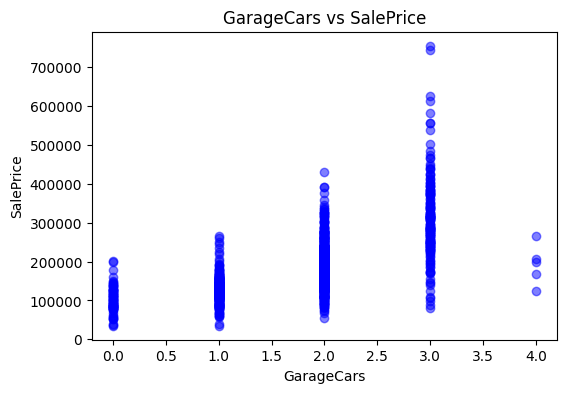

In [25]:
# Select numerical columns to create scatterplots
numerical_columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                     'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'SalePrice']

# Create scatterplots for numerical columns against 'SalePrice'
for col in numerical_columns:
    if col != 'SalePrice':  # Exclude 'SalePrice' itself
        plt.figure(figsize=(6, 4))
        plt.scatter(df[col], df['SalePrice'], alpha=0.5, color='blue')
        plt.title(f'{col} vs SalePrice')
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.show()


In [26]:
columns_to_check = ['FullBath', 'TotRmsAbvGrd']

# Loop through the columns and remove outliers more than 2 standard deviations away from the mean
for col in columns_to_check:
    mean = df[col].mean()
    std = df[col].std()
    threshold = 2 * std

    # Filter out the rows where the values are within 2 standard deviations from the mean
    df = df[abs(df[col] - mean) < threshold]

# Display the resulting DataFrame without outliers
print(df)


      Unnamed: 0.1  Unnamed: 0    Id  MSSubClass MSZoning  LotFrontage  \
0                0           0     1          60       RL         65.0   
1                1           1     2          20       RL         80.0   
2                2           2     3          60       RL         68.0   
3                3           3     4          70       RL         60.0   
4                4           4     5          60       RL         84.0   
...            ...         ...   ...         ...      ...          ...   
1455          1455        1455  1456          60       RL         62.0   
1456          1456        1456  1457          20       RL         85.0   
1457          1457        1457  1458          70       RL         66.0   
1458          1458        1458  1459          20       RL         68.0   
1459          1459        1459  1460          20       RL         75.0   

      LotArea Street Alley LotShape  ... PoolQC  Fence MiscFeature MiscVal  \
0        8450   Pave   NaN      R

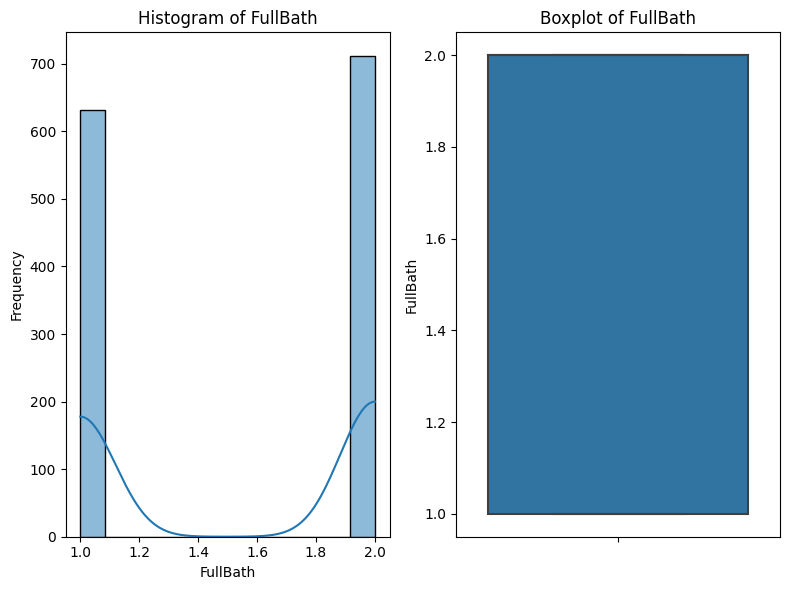

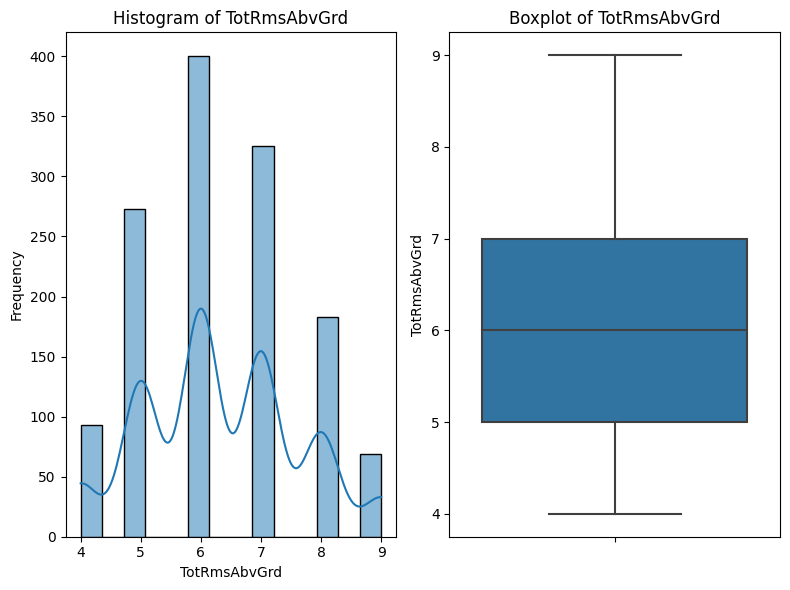

In [27]:
# Draw plots for visualization
for col in columns_to_check:
    plt.figure(figsize=(8, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


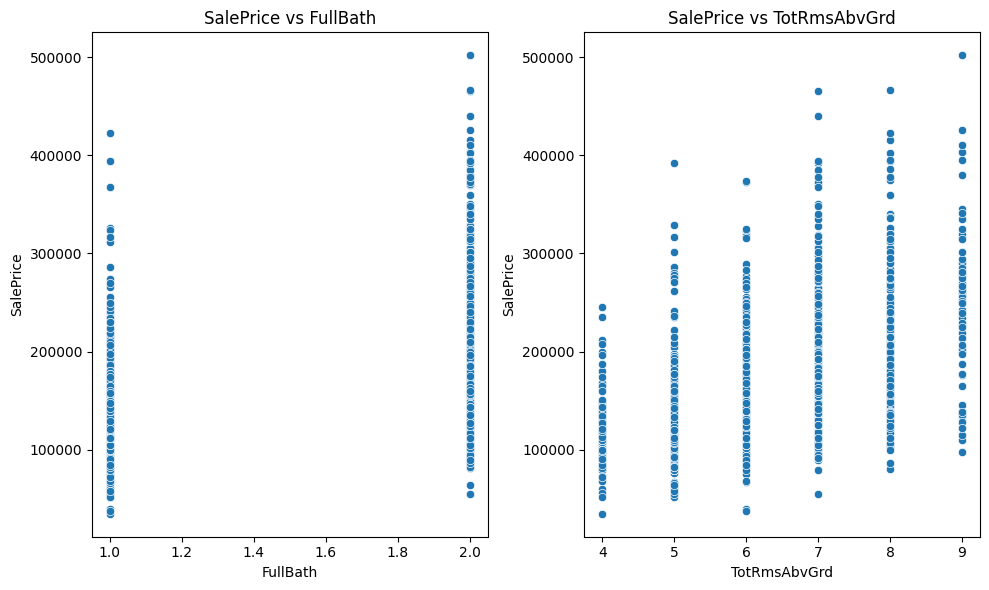

In [28]:
# Visualize SalePrice with FullBath and TotRmsAbvGrd
plt.figure(figsize=(10, 6))

# Scatter plot for SalePrice vs FullBath
plt.subplot(1, 2, 1)
sns.scatterplot(x='FullBath', y='SalePrice', data=df)
plt.title('SalePrice vs FullBath')
plt.xlabel('FullBath')
plt.ylabel('SalePrice')

# Scatter plot for SalePrice vs TotRmsAbvGrd
plt.subplot(1, 2, 2)
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.title('SalePrice vs TotRmsAbvGrd')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


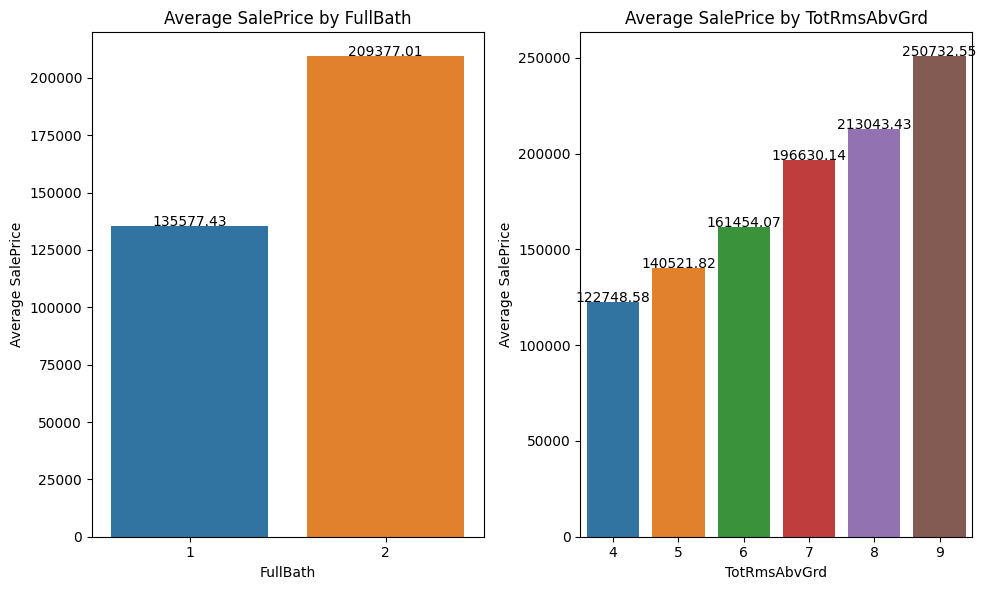

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by 'FullBath' and calculating mean SalePrice
fullbath_mean_price = df.groupby('FullBath')['SalePrice'].mean().reset_index()

# Bar chart for SalePrice vs FullBath with data labels on bars
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
barplot = sns.barplot(x='FullBath', y='SalePrice', data=fullbath_mean_price)
plt.title('Average SalePrice by FullBath')
plt.xlabel('FullBath')
plt.ylabel('Average SalePrice')

# Adding data labels on top of each bar
for index, row in fullbath_mean_price.iterrows():
    barplot.text(row.name, row['SalePrice'], f'{row["SalePrice"]:.2f}', color='black', ha="center")

# Grouping data by 'TotRmsAbvGrd' and calculating mean SalePrice
totrooms_mean_price = df.groupby('TotRmsAbvGrd')['SalePrice'].mean().reset_index()

# Bar chart for SalePrice vs TotRmsAbvGrd with data labels on bars
plt.subplot(1, 2, 2)
barplot2 = sns.barplot(x='TotRmsAbvGrd', y='SalePrice', data=totrooms_mean_price)
plt.title('Average SalePrice by TotRmsAbvGrd')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Average SalePrice')

# Adding data labels on top of each bar
for index, row in totrooms_mean_price.iterrows():
    barplot2.text(row.name, row['SalePrice'], f'{row["SalePrice"]:.2f}', color='black', ha="center")

plt.tight_layout()
plt.show()


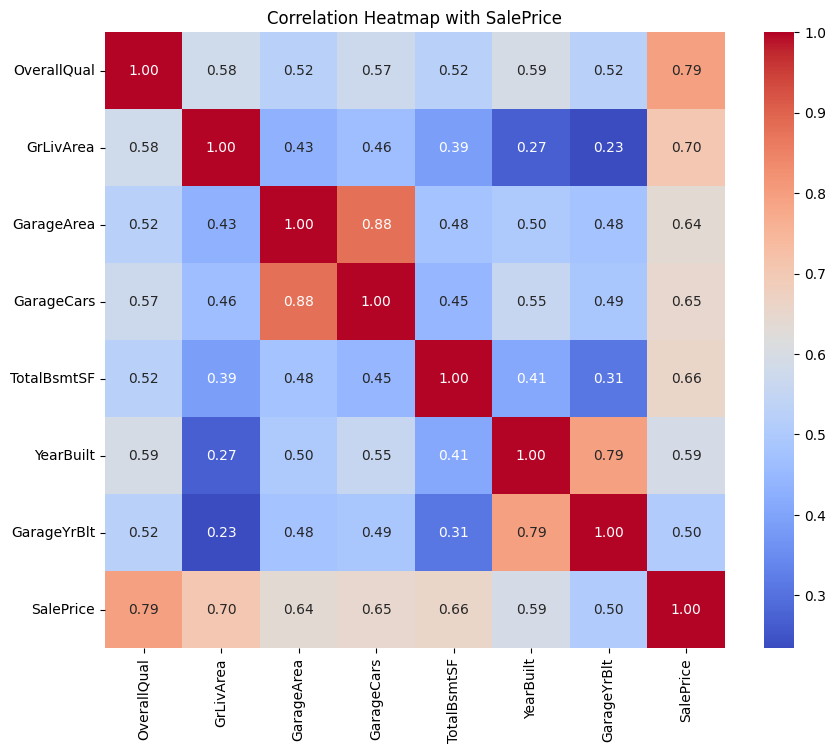

In [32]:

# Select relevant numeric features for correlation analysis
numeric_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'GarageYrBlt', 'SalePrice']

# Create a correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with SalePrice')
plt.show()


<ipython-input-37-c09ff58a070b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='OverallQual', y='SalePrice', data=df, ci=None)


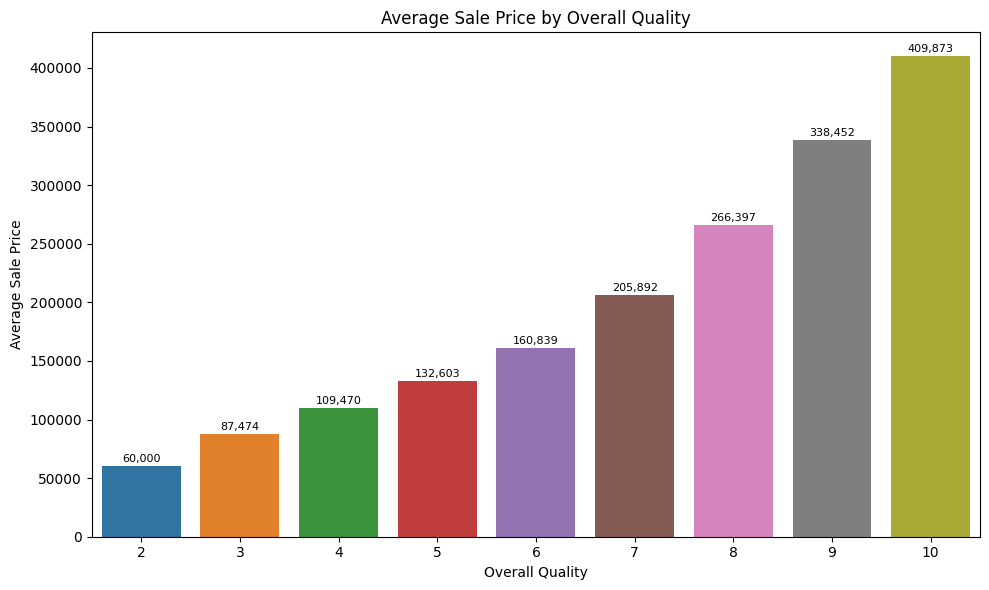

In [37]:

# Creating a bar chart for OverallQual and SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=df, ci=None)

# Add data labels (values) on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.title('Average Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.tight_layout()
plt.show()


In [30]:
df.to_csv('processed_data.csv', index=False)
